<a href="https://colab.research.google.com/github/gtrujillod/TDTChannels/blob/master/Copia_de_OrtogonVectoSpaceNorma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este ejemplo conecta la teoría de normas y productos internos con un use case real de NLP (Procesamiento del Lenguaje Natural) → medir similitud de textos.**

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from numpy.linalg import norm

# 1. Corpus de documentos
docs = [
    "Machine learning is a field of artificial intelligence",            #Doc1 habla de machine learning e inteligencia artificial.
    "Deep learning is a subset of machine learning",
    "Soccer is a popular sport in Europe",                               #Doc3 habla de soccer y sport.
    "Artificial intelligence includes machine learning and robotics"
]

# Tokenizacion
# Doc1 → ['machine', 'learning', 'is', 'a', 'field', 'of', 'artificial', 'intelligence']
# Doc2 → ['deep', 'learning', 'is', 'a', 'subset', 'of', 'machine', 'learning']
# Doc3 → ['soccer', 'is', 'a', 'popular', 'sport', 'in', 'europe']
# Doc4 → ['artificial', 'intelligence', 'includes', 'machine', 'learning', 'and', 'robotics']
# Unir todas las palabras únicas
# {'and', 'artificial', 'deep', 'europe', 'field', 'in', 'includes', 'intelligence',
#  'is', 'learning', 'machine', 'of', 'popular', 'robotics', 'soccer', 'sport', 'subset'}
# Contar cuántas únicas
# En total hay 17 palabras distintas → ese es tu vocabulario.  (CountVectorizer)

# [0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0]  doc 1  (mapeo)

# 2. Representación en espacio vectorial (Bolsa de palabras)
vectorizer = CountVectorizer()                                      # Transforma cada documento en un vector de números.
X = vectorizer.fit_transform(docs).toarray()                        # construye el vocabulario y cuenta cuántas veces aparece cada palabra en cada documento.     # toarray() convierte la matriz dispersa en una matriz NumPy.
features = vectorizer.get_feature_names_out()                       # guarda el vocabulario ordenado alfabéticamente.

print("=== Matriz de representación ===")
print(X)
print("=== Vocabulario ===")
print(features)

# 3. Impresion del documento 1 (se puede imprmir cualquier documento)
doc_id = 0   # Doc1 (Python empieza en 0)
doc_vector = X[doc_id]  # Seleccionar la fila de la matriz X correspondiente al Doc1
words_in_doc = [features[i] for i in range(len(features)) if doc_vector[i] > 0] # Filtrar las palabras que tienen conteo > 0 en ese documento (palabras activas)
#impresion
print(f"=== Palabras en Doc{doc_id+1} ===")
print(words_in_doc)

# 4. Funciones matemáticas (usando normas y productos internos)
def cosine_similarity(u, v):
    return np.dot(u, v) / (norm(u) * norm(v))  #La fracción mide el coseno del ángulo entre los dos vectores.

# 5. Calcular similitud entre documentos
print("\n=== Similaridades Coseno ===")
#Intuicion
#Si los documentos tienen muchas palabras en común → ángulo pequeño → similitud cercana a 1., Si casi no tienen palabras en común → ángulo cercano a 90° → similitud cercana a 0.

for i in range(len(docs)):
    for j in range(i+1, len(docs)):
        sim = cosine_similarity(X[i], X[j])
        print(f"Doc{i+1} vs Doc{j+1} → {sim:.4f}")


=== Matriz de representación ===
[[0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 2 1 1 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0]
 [1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0]]
=== Vocabulario ===
['and' 'artificial' 'deep' 'europe' 'field' 'in' 'includes' 'intelligence'
 'is' 'learning' 'machine' 'of' 'popular' 'robotics' 'soccer' 'sport'
 'subset']
=== Palabras en Doc1 ===
['artificial', 'field', 'intelligence', 'is', 'learning', 'machine', 'of']

=== Similaridades Coseno ===
Doc1 vs Doc2 → 0.6299
Doc1 vs Doc3 → 0.1543
Doc1 vs Doc4 → 0.5714
Doc2 vs Doc3 → 0.1361
Doc2 vs Doc4 → 0.3780
Doc3 vs Doc4 → 0.0000


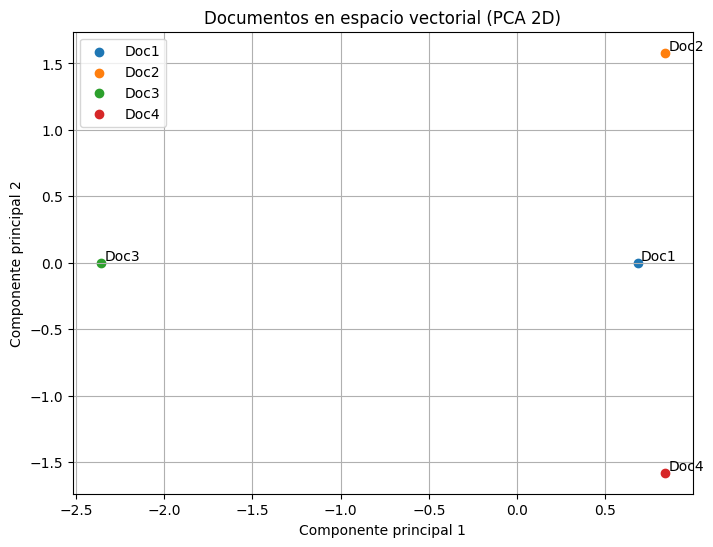

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# 2. Graficar
plt.figure(figsize=(8,6))
for i, doc in enumerate(docs):
    plt.scatter(X_2d[i,0], X_2d[i,1], label=f"Doc{i+1}")
    plt.text(X_2d[i,0]+0.02, X_2d[i,1]+0.02, f"Doc{i+1}", fontsize=10)

plt.title("Documentos en espacio vectorial (PCA 2D)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()


**Realizar lo siguiente**



1.   Cambiar la norma (usar L1 en vez de L2) y observar diferencias.
2.   Probar con textos de su área (biotecnología, telecomunicaciones, economía, etc.).



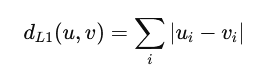